<h1>Preprocessing </h1>

In [42]:
import tensorflow as tf
import cv2
import numpy as np
import os

In [52]:

# This function preprocesses the image by reading in the image apply grayscale make all the sizes the same and 
def preprocess_image(file_path, img_size):
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE) # Grayscale will even the playing field if we start getting different types of images. If the images color is a factor we can take out grayscale
    img = cv2.resize(img, img_size)
    img = img.astype('float')/255.0 # Make the pixels become float and normalize to 0-1 for normalization
    
    return img

# This function will pull from the directory and all subdirectory for the image and give it a label to the directory it is in
def load_images_from_directory(directory, target_size =(224, 224)):
    images = []
    labels = []
    
    # Iterates through all subdirectories
    for subdir in os.listdir(directory):
        label = subdir #Make the subdirectory name be a label
        subdir_path = os.path.join(directory, subdir)

        # Checks if the object it is looking at is a directory and if it is go into the directory and get all the files and preprocess them
        if os.path.isdir(subdir_path):
            for image in os.listdir(subdir_path):
                file_path = os.path.join(subdir_path, image)

                image = preprocess_image(file_path, target_size)
            
                # Append to the arrays after preprocessing
                images.append(image)
                labels.append(label)
        

    return np.array(images), np.array(labels)




In [53]:
# import sys # for debugging 

# Define the directory paths for the training and test datasets
train_dir = "./Alzheimer_s Dataset/train"
test_dir = "./Alzheimer_s Dataset/test"

# Load images and labels from the training directory
alz_images_train, alz_labels_train = load_images_from_directory(train_dir)

# Load images and labels from the test directory
alz_images_test, alz_labels_test = load_images_from_directory(test_dir)

# Print information about the training dataset
print("Train")
print('Image shape:', alz_images_train.shape)
print('Labels shape:', alz_labels_train.shape)

# Print information about the test dataset
print("\nTest")
print('Image shape:', alz_images_test.shape)
print('Labels shape:', alz_labels_test.shape)


# np.set_printoptions(threshold=sys.maxsize) # for debugging

# print('Image train:', alz_images_train) # for debugging

# The output of the shape follows this
#  (X, X1, X2)
# X is the number of pictures in the array   
# X1 is the number of rows for a single picture (should be 224 since that is the scale)
# X2 is the number of columns in each picture  (should be 224 since that is the scale)
#  *Scale can be change to 207 since that is how the data is processed. 
# 
# When pull out the full array, you see alot of 0 at the start and end and that is because of the black around the brain
# 


Train
Image shape: (5121, 224, 224)
Labels shape: (5121,)

Test
Image shape: (1279, 224, 224)
Labels shape: (1279,)


<h1> Aaron's Algorithm </h1>
CNN GCNN or similar neural networks that can be adjusted in between each other

<h1>Jay's Algorthm</h1>
SVM and KNN (K-Nearest Neighbors)

<h1>Geoffrey's Algorithm</h1>
Random Forest and RNN

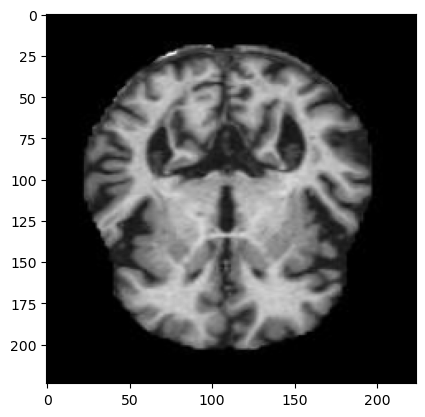

In [71]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


plt.imshow(alz_images_train[0], cmap='gray')


In [72]:
def extract_hog_features(image):
    # Calculate HOG features
    hog_features = hog(image, orientations=9, pixels_per_cell=(8, 8),
    cells_per_block=(2, 2), visualize=False)
    return hog_features

#Hog features for Train Data
#extract_hog_features(alz_images_train[0])
hog_train = []
for i in range (0, len(alz_images_train)):
    hog_train.append(extract_hog_features(alz_images_train[i]))
    
#Classifier
rf_classifier = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=5)
rf_classifier.fit(hog_train, alz_labels_train)

hog_test = []
for i in range (0, len(alz_images_test)):
    hog_test.append(extract_hog_features(alz_images_test[i]))
    
#predict
prediction = rf_classifier.predict(hog_test)

#accuracy score
accuracy_score(prediction, alz_labels_test)


0.5027365129007036